# Allgemeines Vorgehen innerhalb des PCA-Algorithmus

Ziel 1 
Finde ein neues Koordinatensystem, das die Punktwolke besser beschreibt. 
Die Achsen des Koordinatensystems 
sollen möglichst durch die "dichtesten" Bereiche der Punktwolke führen.


Ziel 2 
Finde heraus, 
wie viele Spalten aus dem neuen System man weglassen kann, 
ohne dass viel Information verloren geht.

Ziel 3
Die Spalten, die in dem neuen System beschrieben werden,
sollen nicht korrelieren


Methode für Ziel1 und Ziel3:
a) erstelle die Kovarianz-Matrix
b) Benutze die Kovarianz-Matrix, um eine "Drehmatrix" zu berechnen
	d.h. 
    b1) Berechne die Eigenvektoren der Kovarianz-Matrix
	b2) Fasse die Eigenvektoren zu einer Matrix zusammen
  Die Zusammenfassung der Eigenvektoren ist die "Drehmatrix"

c) Beschreibe die Punkte von X neu,
        mit Hilfe des Koordinatensystems, das durch die Drehmatrix gefunden wurde.
   Die neue Beschreibung der Datensätze (= X_transform) ergibt sich automatisch 
        durch  Matrix-Multiplikation (X_transform = Drehmatrix @ X)

Methode für Ziel 2:
    a) Untersuche den Beitrag, den die einzelnen neue Achsten zur Gesamtinformation leisten.
       Dazu kann man schauen auf
        a1) die Größe der Eigenwerte (singular Values)
            (Die Größe der Eigenwerte entspricht der Verlängerung der Eigenvektoren nach der Transformtion)
        a2) die Größe der explained Variance
    b) Lasse die Achsen weg, wo die Verlängerung der Eigenvektoren am kleinsten ist
        b1) Anders formuliert: behalte die Achsen(PrincipalComponentes=Eigenvektoren)
            die ca 95 % der Gesamtinformation rekonstruieren.

# Die Kovarianz-Matrix

In [11]:
# Wir wissen : Die Kovarianzen (Korrelationen ) zwischen den Spalten spielen eine Rolle
# Wir wollen sie entfernen
# Vorbereitung für das Weitere:
# Wir berechnen für unseren Datensatz X eine Kovarianz-Matrix

In [12]:
import numpy as np
a1=np.arange(1,5)
a2=a1*a1
a3=a2*a1
print(a1)
print(a2)
print(a3)

[1 2 3 4]
[ 1  4  9 16]
[ 1  8 27 64]


In [13]:
a1=a1-a1.mean()
print("a1 zentriert",a1)
a2=a2-a2.mean()
print("a2 zentriert",a2)
a3=a3-a3.mean()
#print("a3 zentriert",a3)

a1 zentriert [-1.5 -0.5  0.5  1.5]
a2 zentriert [-6.5 -3.5  1.5  8.5]


In [14]:
X=np.c_[a1,a2]
print("Matrix X \n",X[0],"\n",X[1],"\n",X[2],"\n",X[3])

Matrix X 
 [-1.5 -6.5] 
 [-0.5 -3.5] 
 [0.5 1.5] 
 [1.5 8.5]


In [15]:
print("transponierte Matrix X.T\n",X.T)#X[0],"\n",X[1],"\n",X[2])

transponierte Matrix X.T
 [[-1.5 -0.5  0.5  1.5]
 [-6.5 -3.5  1.5  8.5]]


In [16]:
print("Kovarianz, berechnet über Skalarprodukt\n",X.T@X /4)
print("Kovarianz berechnet über numpy\n",np.cov(a1,a2,bias=True))# dasselbe
#print("Korrelationskoeffizienten\n",np.corrcoef(a1,a2,a3))

M = X.T @ X / 4
erste_komponente_M = X.T[0] @ X[:,0] /4
print("erste_komponente_M",erste_komponente_M)

Kovarianz, berechnet über Skalarprodukt
 [[ 1.25  6.25]
 [ 6.25 32.25]]
Kovarianz berechnet über numpy
 [[ 1.25  6.25]
 [ 6.25 32.25]]
erste_komponente_M 1.25


# Eigenvektoren

###### Beispiel für einen Eigenvektor

In [17]:
# Eigenvektoren sind besondere Vektoren, die einer Matrix zugeordnet sind
# Wenn Eigenvektoren mit "ihrer" Matrix multipliziert werden,
# verändern sie ihre Länge.


vektor =np.linalg.eigh(M)[1][0] *10
# Bitte die obige  Zeile ignorieren, 
# hier wird mit technischen Mitteln der Eigenvektor berechnet
print("Der Ausgangsvektor:\t",vektor)
vektor2 = M @ vektor
print("\nDer durch die Matrix-Multiplikation verlängert Vektor:")
print("\t\t\t",vektor2)
print("\nDer Verlängerungsfaktor",vektor2/vektor)
# Hier wurde die Länge von Vektor verändert, aber nicht seine Richtung

Der Ausgangsvektor:	 [-9.81692791  1.90471163]

Der durch die Matrix-Multiplikation verlängert Vektor:
			 [-0.36671219  0.07115067]

Der Verlängerungsfaktor [0.03735509 0.03735509]


###### Beispiel für einen normalen Vektor

In [18]:
# Bei den anderen Vektoren, kommt als Ergebnis ein völlig neuer Vektor, 
# der sich bezüglich Länge und Richtung von dem Ausgangsvektor unterscheidet.
vektor3 =np.array((4,8))
print("irgend ein Vektor, z.B.V=(4,8)")
print("Vektor nach Matrix-Multiplikation=",M@vektor3)


irgend ein Vektor, z.B.V=(4,8)
Vektor nach Matrix-Multiplikation= [ 55. 283.]


###### Berechnung von Eigenvektoren

In [19]:
#Eigenvektoren kann man mit Funktionen aus dem Modul numpy.linalg berechnen
from numpy.linalg import eigh,eig 
# eig liefert 2 Eigenwerte und 2 Eigenvektoren, wobei die Eigenwerte eventuell komplexe Zahlen sind
# eig liefert positive Eigenwerte und 2 Eigenvektoren
print("Output von Eig",eig(M))
print("Output von Eigh",eigh(M))
erster_Eigenwert=eigh(M)[0][0]
erster_Eigenvektor = eigh(M)[1][0]
print("erster_Eigenwert",erster_Eigenwert)
print("erster_Eigenvektor",erster_Eigenvektor)


Output von Eig EigResult(eigenvalues=array([ 0.03735509, 33.46264491]), eigenvectors=array([[-0.98169279, -0.19047116],
       [ 0.19047116, -0.98169279]]))
Output von Eigh EighResult(eigenvalues=array([ 0.03735509, 33.46264491]), eigenvectors=array([[-0.98169279,  0.19047116],
       [ 0.19047116,  0.98169279]]))
erster_Eigenwert 0.03735508664173165
erster_Eigenvektor [-0.98169279  0.19047116]


# Der Effekt der Umstellung des Koordinatensystems

###### Linearkombinationen im alten Koordinatensystem

Jeder Vektor(Punkt) der Ebene lässt sich als Linearkombination von 2 Grundvektoren darstellen.                      
Jeder Vektor(Punkt) des Raumes lässt sich als Linearkombination von 3 Grundvektoren darstellen.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
v1=np.array([1,0]); v2=np.array([0,1]);
print("Vektoren auf den alten Achsen:",v1,v2)
p1=np.array([-3,5])
print("Punkt",p1)
"""(Gehe -3 Schritte entlang der Achse v1,Gehe 5 Schritte entlang v2))"""

Vektoren auf den alten Achsen: [1 0] [0 1]
Punkt [-3  5]


'(Gehe -3 Schritte entlang der Achse v1,Gehe 5 Schritte entlang v2))'

In [ ]:
print("Linearkombination", -3*v1 + 5*v2)

Linearkombination [-3  5]


###### Der selbe Punkt als Linearkombination neuen System

In [ ]:
##### zweiter Versuch der Linerarkombination
v11=np.array([1,1]); v22=np.array([-1,1])

print("neue Achsenvektoren:",v11,v22)
p1=np.array([-3,5])
print("Punkt",p1)
print("Im neuen System ist der Punkt eine Linearkombination aus  (1,4)\n") 
print("Wenn die neuen Achsen im alten System beschrieben werden ,ergibt sich :",end=" ")
print( 1*v11+4 *v22)

neue Achsenvektoren: [1 1] [-1  1]
Punkt [-3  5]
Im neuen System ist der Punkt eine Linearkombination aus  (1,4)

Wenn die neuen Achsen im alten System beschrieben werden ,ergibt sich : [-3  5]


###### Darstellung der  Punkts als Linearkombination in einem 3. Achsensystem

In [ ]:
#dritter Versuch der Linerarkombination
v111=np.array([0.5,1]);v222=np.array([1,1])
print("Grundvektoren:",v111,v222)
p1=np.array([-3,5])
print("Punkt",p1)
print("Linearkombination", 16*v111 -11*v222)

Grundvektoren: [0.5 1. ] [1 1]
Punkt [-3  5]
Linearkombination [-3.  5.]


###### Anfordung an jedes System von Koordinatenachsen

In [ ]:
#Um ein komplettes Koordinatensystem aufzuspannen, müssen die Grundvektoren senkrecht aufeinanderstehen.(Orthogonalsytem)
#in diesem Fall wäre ihr Skalarprodukt =0
print(v1@v2) #senkrechte Achsen
print((2*v11)   @   (100*v22))#senkrechte Achsen
print(v111@v222)#schiefstehende Achsen


0
0
1.5


# Drehung eines Koordinatensystems

In [ ]:
# Allgemein: Man kann eine Matrix benutzen, um eine Punktmenge(z.B. Linie) zu drehen

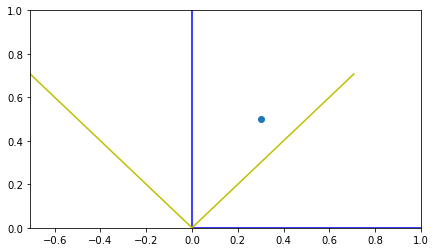

In [ ]:
# Ein Plot für ein Koordinatensystem, das entstanden ist,
# indem das alte Koordinatensystem gedreht wurde
v11=v11/np.linalg.norm(v11)
v22=v22/np.linalg.norm(v22)
plt.rcParams["figure.figsize"] = (7, 4)
ax=plt.gca()
ax.margins(x=0,y=0)
plt.plot([0,v1[0]],[0,v1[1]],"b")
plt.plot([0,v2[0]],[0,v2[1]],"b")
plt.plot([0,v11[0]],[0,v11[1]],"y")
plt.plot([0,v22[0]],[0,v22[1]],"y")
plt.scatter([0.3],[0.5])#dies ist ein beliebiger Punkt, der sich gut zeichnen lässt
plt.show()


In [ ]:
# die Drehung entsteht durch Multiplikation mit einer bestimmten Matrix
v11=np.array([[1,-1],[1,1]])@v1
print("x-Achse:",v1,"\t","gedreht:",v11)
v22=np.array([[1,-1],[1,1]])@v2
print("x-Achse:",v2,"\t","gedreht:",v22)

x-Achse: [1 0] 	 gedreht: [1 1]
x-Achse: [0 1] 	 gedreht: [-1  1]


In [ ]:
# Allgemeiner: Die Komponenten der Drehmatrix kann man im 2-dimensionalen Fall
# mittels sinus und cosinus ausrechnen
alpha=np.pi/6
Drehmatrix=np.array([[np.cos(alpha),-np.sin(alpha)],
                     [np.sin(alpha),np.cos(alpha)]])
print(Drehmatrix)

[[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]]


In [ ]:
# Die Verbindung zwischen dem Ursprung und einem Punkt P0 wird gedreht.
P0=[0,0]
P1=[0.5,0.3]
P2=Drehmatrix @ P1
P2

array([0.2830127 , 0.50980762])

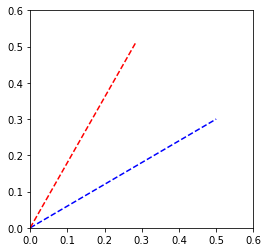

In [ ]:
# Der Plot 
plt.rcParams["figure.figsize"] = (4, 4)
ax=plt.gca()
ax.margins(x=0,y=0)
ax.set_xlim((0, 0.6))
ax.set_ylim((0, 0.6))
plt.plot([0,P1[0]],[0,P1[1]],"b--")
plt.plot([0,P2[0]],[0,P2[1]],"r--")
plt.show()

# PCA

Ziel: Finde eine Matrix, die das Koordinatensystem so verdreht, dass bestimmte Achsen näher an den Daten liegen.
Lösung: Die Drehmatrix besteht aus den Eigenvektoren der Kovarianzmatrix

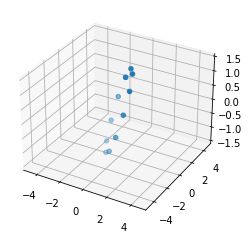

In [ ]:
#Daten generieren
alpha=np.linspace(0,2*np.pi,12)
X=np.sin(alpha)
Y=np.cos(alpha)
Z=X+Y

plt.rcParams["figure.figsize"] = (4, 4)
ax=plt.axes(projection="3d")
ax.margins(x=0,y=0)
ax.set_xlim((-5, 5))
ax.set_ylim((-5, 5))
ax.scatter3D(X,Y,Z)

plt.show()

In [ ]:
#Daten generieren, einfach
def gerade(N=100,grenze=10):
    X=np.linspace(0,grenze,N)
    Y=np.linspace(0,grenze,N)
    Z=X+Y#+np.random.rand(N)*0.001
    daten = X,Y,Z
    return daten

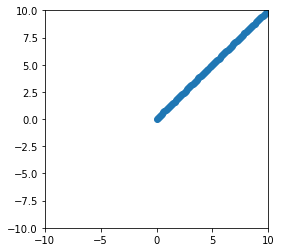

In [ ]:
#Daten printen: 2dimensional
#daten enthalten nur Werte für X und Y , als Tupel!
def daten_printen2D(daten,grenze=10):
    X,Y=daten
    
    plt.figure(figsize=(4,4))
    ax = plt.axes()
    ax.margins(x=0, y=0)
    ax.set_xlim((-grenze, grenze))
    ax.set_ylim((-grenze, grenze))
   
    ax.scatter(X, Y)  
    #ax.scatter(0,0,"r")
    
    plt.show()
N=100;grenze=10
gerade2=gerade(N,grenze)
daten_printen2D((gerade2[0],gerade2[1]))

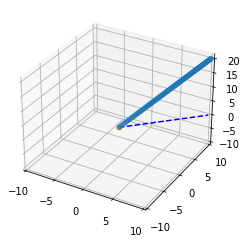

In [ ]:
#Daten printen: 3dimensional
#daten ist ein 3Tupel 
def daten_printen3D(daten,grenze=10):
    X,Y,Z=daten    
    plt.figure(figsize=(4,4))
    ax = plt.axes(projection="3d")
    ax.margins(x=0, y=0,z=0)
    ax.set_xlim((-grenze, grenze))
    ax.set_ylim((-grenze, grenze))
    ax.set_zlim((-grenze, 2*grenze+1))
    ax.scatter3D(X, Y, Z)
    
    ax.plot3D([0,10],[0,10],"b--")
    ax.scatter3D(0,0,0,"r")
    
    plt.show()
N=100;grenze=10
daten_printen3D(gerade(N,grenze),grenze=grenze)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca=PCA(n_components=3)
N=100;grenze=10
X,Y,Z=gerade(N=N,grenze=grenze)
daten = np.hstack((X, Y, Z)).reshape(N, 3)
#daten=scale(daten,axis=0,with_std=False)#unnötig, weil PCA selbst zentriert
bereinigt=pca.fit_transform(daten)
if len(bereinigt.shape)==3:    
    daten_printen3D((bereinigt[:,0],bereinigt[:,1],bereinigt[:,2]))
elif len(bereinigt.shape)==2:
    daten_printen2D((bereinigt[:,0],bereinigt[:,1]))

FileNotFoundError: Could not find module 'C:\Users\Lehre\anaconda3\lib\site-packages\scipy\.libs\libbanded5x.TNNMG3IXHGJK7NIBT5J6YPEO5XWTOQAJ.gfortran-win_amd64.dll' (or one of its dependencies). Try using the full path with constructor syntax.